# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 20%,40%, 80%, 90% cloudiness.
* There is no strong relationship between latitude and wind speed. However, there's a bunch of Latitude 60 cities that are super windy for some reason.
* There are a couple outliers that are stupid humid.  They're right below the equator, so I'm not sure if it's bad data or there are just 2 really, really humid places in this dataset.  (My guess is they're legitimate outliers, though...)
* There are a more cities in the positive latitudes than the negative latitudes, and I don't think that's due to my sample. I think that's just a thing.



In [1]:
# Import a buncha stuff for later
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Grab the API key from the config file
from config import api_key

# Import this new citipy to determine city based on latitude and longitude
from citipy import citipy

# Make an Output File name (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations - i increased the size to get a little more data in case the API calls returned with errors
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print (cities)

768


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Do some URL stuff
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
#In honor of the NCAA march madness tourney, i am going to create a bunch of BUCKETS
#Get it?  

lon = []
lat = []
humidity = []
sys_country = []
temp_min = []
temp_max = []
wind_speed = []
clouds_all = []
dt = []
city_name = []


#Fur loop through the cities and get all the responses and stuff
for city in cities:
    try:
        # Build query URL - get rid of the spaces too cuz i'm smooth like that
        query_url = f"{url}appid={api_key}&units={units}&q=" + city.replace(" ", "")
         

        #print(query_url)

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        city_name.append(weather_json['name'])
        sys_country.append(weather_json['sys']['country'])
        humidity.append(weather_json['main']['humidity'])
        temp_min.append(weather_json['main']['temp_min'])
        temp_max.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        clouds_all.append(weather_json['clouds']['all'])
        dt.append(weather_json['dt'])
        
        #Ok, that was a lot of typing....  print out stuff to show it's working 
        print(f"Successfully retrieved API response for: {weather_json['name']}.")
    except:
        print("City not found. Skipping...")

City not found. Skipping...
Successfully retrieved API response for: Ternate.
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Successfully retrieved API response for: Kondinskoye.
City not found. Skipping...
Successfully retrieved API response for: Mataura.
Successfully retrieved API response for: Grand-Lahou.
Successfully retrieved API response for: Namibe.
City not found. Skipping...
Successfully retrieved API response for: Nanortalik.
Successfully retrieved API response for: Ushuaia.
Successfully retrieved API response for: Leningradskiy.
Successfully retrieved API response for: Kaitangata.
Successfully retrieved API response for: Bereznik.
City not found. Skipping...
Successfully retrieved API response for: Severo-Kurilsk.
Successfully retrieved API response for: Lixourion.
City not found. Skipping...
Successfully retrieved API response for: Busselton.
Successfully retrieved API response for: Khandyga.
Successfully retrieved API response for: Esc

Successfully retrieved API response for: Mecca.
Successfully retrieved API response for: Koraput.
City not found. Skipping...
Successfully retrieved API response for: Kruisfontein.
Successfully retrieved API response for: Dingle.
Successfully retrieved API response for: Airai.
Successfully retrieved API response for: Ende.
Successfully retrieved API response for: Lewiston.
Successfully retrieved API response for: Maua.
City not found. Skipping...
City not found. Skipping...
Successfully retrieved API response for: Mayo.
Successfully retrieved API response for: Yellowknife.
City not found. Skipping...
Successfully retrieved API response for: Souillac.
Successfully retrieved API response for: Sistranda.
City not found. Skipping...
Successfully retrieved API response for: Tadine.
Successfully retrieved API response for: Pouembout.
Successfully retrieved API response for: Deniliquin.
Successfully retrieved API response for: Bandarbeyla.
City not found. Skipping...
Successfully retrieved AP

Successfully retrieved API response for: Laguna.
Successfully retrieved API response for: Kawalu.
Successfully retrieved API response for: Yerbogachen.
City not found. Skipping...
Successfully retrieved API response for: Antofagasta.
Successfully retrieved API response for: Hohhot.
Successfully retrieved API response for: Zhifang.
Successfully retrieved API response for: Chicama.
Successfully retrieved API response for: Manama.
Successfully retrieved API response for: Deputatskiy.
City not found. Skipping...
City not found. Skipping...
Successfully retrieved API response for: Martapura.
Successfully retrieved API response for: Bagaces.
Successfully retrieved API response for: Neepawa.
Successfully retrieved API response for: Tuatapere.
Successfully retrieved API response for: Dwarka.
Successfully retrieved API response for: Uige.
Successfully retrieved API response for: Hit.
Successfully retrieved API response for: Kasungu.
Successfully retrieved API response for: Singaraja.
Successful

City not found. Skipping...
Successfully retrieved API response for: Baykit.
Successfully retrieved API response for: Chuguyevka.
Successfully retrieved API response for: Bhadrachalam.
City not found. Skipping...
Successfully retrieved API response for: Roald.
City not found. Skipping...
Successfully retrieved API response for: Marathon.
Successfully retrieved API response for: Arlit.
Successfully retrieved API response for: Kanniyakumari.
City not found. Skipping...
Successfully retrieved API response for: Chapais.
Successfully retrieved API response for: Tura.
Successfully retrieved API response for: Nouadhibou.
City not found. Skipping...
Successfully retrieved API response for: Qaqortoq.
Successfully retrieved API response for: Melhus.
Successfully retrieved API response for: Clonakilty.
Successfully retrieved API response for: Talnakh.
Successfully retrieved API response for: Challapata.
Successfully retrieved API response for: Calvinia.
Successfully retrieved API response for: Is

Successfully retrieved API response for: Bloemfontein.
City not found. Skipping...
Successfully retrieved API response for: Banjar.
Successfully retrieved API response for: Guanagazapa.
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Successfully retrieved API response for: Mahina.
City not found. Skipping...
Successfully retrieved API response for: Sarangani.
Successfully retrieved API response for: Yokadouma.
Successfully retrieved API response for: Blythe.
City not found. Skipping...
Successfully retrieved API response for: Zhangye.
Successfully retrieved API response for: Pocone.
Successfully retrieved API response for: Sur.
Successfully retrieved API response for: Mackay.
Successfully retrieved API response for: Bumba.
City not found. Skipping...
Successfully retrieved API response for: Zhigansk.
Successfully retrieved API response for: Pachelma.
Successfully retrieved API response for: Pitimbu.
City not found. Skipping...
Successfully retrieved

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, and temp
#How come when you buy a bucket of beers at a bar, they only give you 5 beers
#It's a total scam.... cuz who goes to a bar with exactly 5 people?
#There's always that one extra one that puts one person a round ahead, so you feel like you have to get another bucket
#Anyways, I'm going to put all my list buckets into a dictionary to turn into a dataframe in a minute
weather_dict = {"City": city_name, 
"Country" : sys_country,
"Longitude" : lon, 
"Latitude" : lat,
"Humidity" : humidity,
"Minimum Temperature" : temp_min,
"Maximum Temperature" : temp_max,
"Wind Speed" : wind_speed,
"Cloudiness" : clouds_all,
"Date" : dt
               }

In [5]:
weather_data = pd.DataFrame(weather_dict)
print(weather_data.shape)

weather_data.to_csv(output_data_file, encoding='utf-8', index=False)
weather_data.head(10)

(576, 10)


,City,Country,Longitude,Latitude,Humidity,Minimum Temperature,Maximum Temperature,Wind Speed,Cloudiness,Date
0,Ternate,PH,120.72,14.29,69,80.01,81.00,9.17,40,1553362300
1,Kondinskoye,RU,67.41,59.65,87,23.35,23.35,2.95,0,1553362383
2,Mataura,NZ,168.86,-46.19,91,55.99,55.99,2.73,64,1553361606
3,Grand-Lahou,CI,-5.00,5.24,67,85.72,85.72,5.30,12,1553362383
4,Namibe,AO,12.15,-15.19,100,78.25,78.25,6.76,24,1553362250
5,Nanortalik,GL,-45.24,60.14,100,23.17,23.17,17.72,24,1553362205
6,Ushuaia,AR,-68.31,-54.81,81,50.00,53.60,3.36,20,1553360400
7,Leningradskiy,RU,178.42,69.38,79,-8.07,-8.07,20.29,80,1553362252
8,Kaitangata,NZ,169.85,-46.28,91,56.38,56.38,3.96,80,1553362262
9,Bereznik,RU,42.71,62.86,84,32.62,32.62,13.13,76,1553362387


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

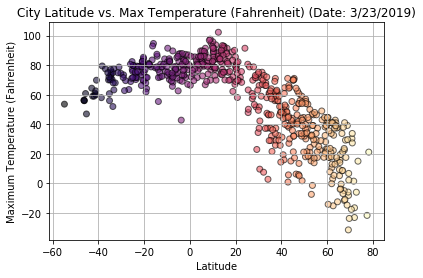

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Maximum Temperature"], marker="o", c = weather_data["Latitude"], alpha=0.6, cmap='magma', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Fahrenheit) (Date: 3/23/2019)")
plt.ylabel("Maximum Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Max_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

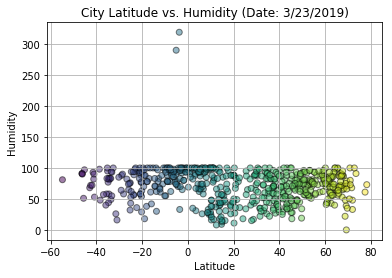

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", c = weather_data["Latitude"], alpha=0.5, cmap='viridis', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date: 3/23/2019)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

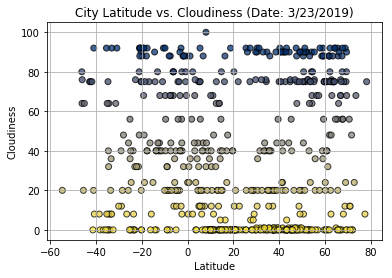

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", c = weather_data["Cloudiness"], alpha=0.75, cmap='cividis_r', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date: 3/23/2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

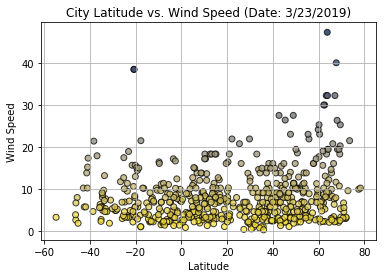

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", c = weather_data["Wind Speed"], alpha=0.75, cmap='cividis_r', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date: 3/23/2019)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed.png")

# Show plot
plt.show()